## IMPORT LIBRARIES

In [1]:
import pandas as pd
import pandasql as psql

import matplotlib.pyplot as  plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import requests
import json

## DATA PREPARATION

In [2]:
# membuat function untuk mengambil country

def get_cases(country):
    
    # mengakses data dari API dan diubah menjadi data json

    req = requests.get(f'https://corona.lmao.ninja/v2/historical/{country}?lastdays=all')
    req_json = req.json()
    
    # mengubah kolom tanggal dan jumlah cases ke dalam list
    
    dates = []
    cases = []
    for i in req_json['timeline']['cases'] :
        dates.append(i)
        cases.append(req_json['timeline']['cases'].get(i))
    
    # membuat dataframe
    
    df = pd.DataFrame()
    df['date'] = pd.to_datetime(dates)
    df['cases'] = cases
    
    # menormalisasi kolom cases
    
    scaler = MinMaxScaler()
    df['cases_normalized'] = scaler.fit_transform(pd.DataFrame(df['cases']))
    
    # membuat query untuk memfilter data sesuai tanggal (1 July s/d 1 Nov)    
    
    query = """
    SELECT date(date) AS date, cases, cases_normalized
    FROM df
    WHERE date BETWEEN '2020-07-01' AND '2020-11-02'
    """
    
    # memfilter dataframe dengan query dan merubah date menjadi datetime object
    
    df = psql.sqldf(query)
    df['date'] = pd.to_datetime(df['date'])
    
    return df

## VISUALIZATION

### > INDONESIA

In [3]:
# membuat dataframe Indonesia

df_ina = get_cases('Indonesia')

In [4]:
df_ina.head()

,date,cases,cases_normalized
0,2020-07-01,57770,0.130011
1,2020-07-02,59394,0.133666
2,2020-07-03,60695,0.136593
3,2020-07-04,62142,0.139850
4,2020-07-05,63749,0.143466


### > CHINA

In [5]:
# membuat dataframe China

df_chn = get_cases('China')

In [6]:
df_chn.head()

,date,cases,cases_normalized
0,2020-07-01,84816,0.924285
1,2020-07-02,84830,0.924439
2,2020-07-03,84838,0.924526
3,2020-07-04,84857,0.924735
4,2020-07-05,84871,0.924888


### > INDIA

In [7]:
# membuat dataframe India

df_ind = get_cases('India')

In [8]:
df_ind.head()

,date,cases,cases_normalized
0,2020-07-01,604641,0.070014
1,2020-07-02,625544,0.072434
2,2020-07-03,648315,0.075071
3,2020-07-04,673165,0.077949
4,2020-07-05,697413,0.080756


### > UNITED STATES OF AMERICA

In [9]:
# membuat dataframe USA

df_usa = get_cases('USA')

In [10]:
df_usa.head()

,date,cases,cases_normalized
0,2020-07-01,2679609,0.261371
1,2020-07-02,2734697,0.266744
2,2020-07-03,2787208,0.271866
3,2020-07-04,2832878,0.276321
4,2020-07-05,2882761,0.281187


### > VISUALISASI SELURUH NEGARA 

#### REAL DATA

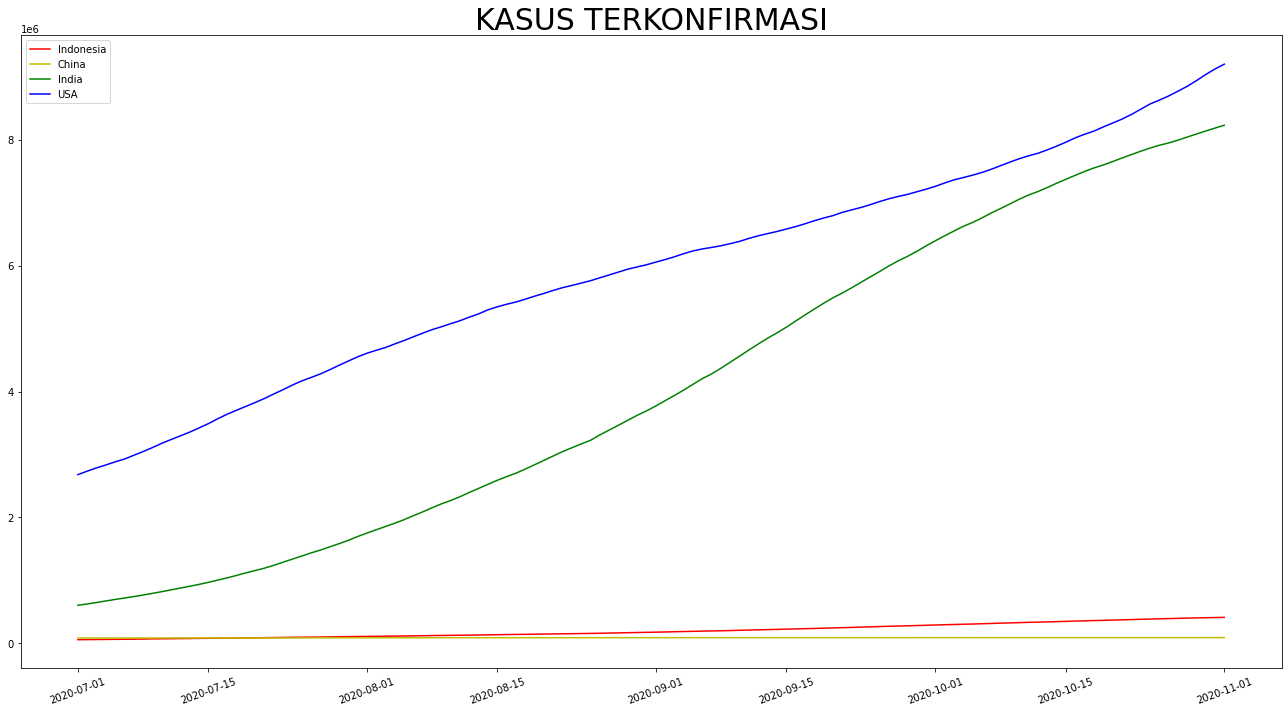

In [11]:
plt.figure(figsize=(18,10))

plt.plot(df_ina['date'], df_ina['cases'], 'r-', label='Indonesia')
plt.plot(df_chn['date'], df_chn['cases'], 'y-', label='China')
plt.plot(df_ind['date'], df_ind['cases'], 'g-', label='India')
plt.plot(df_usa['date'], df_usa['cases'], 'b-', label='USA')

plt.title('KASUS TERKONFIRMASI', fontsize=30)

plt.xticks(rotation=20)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

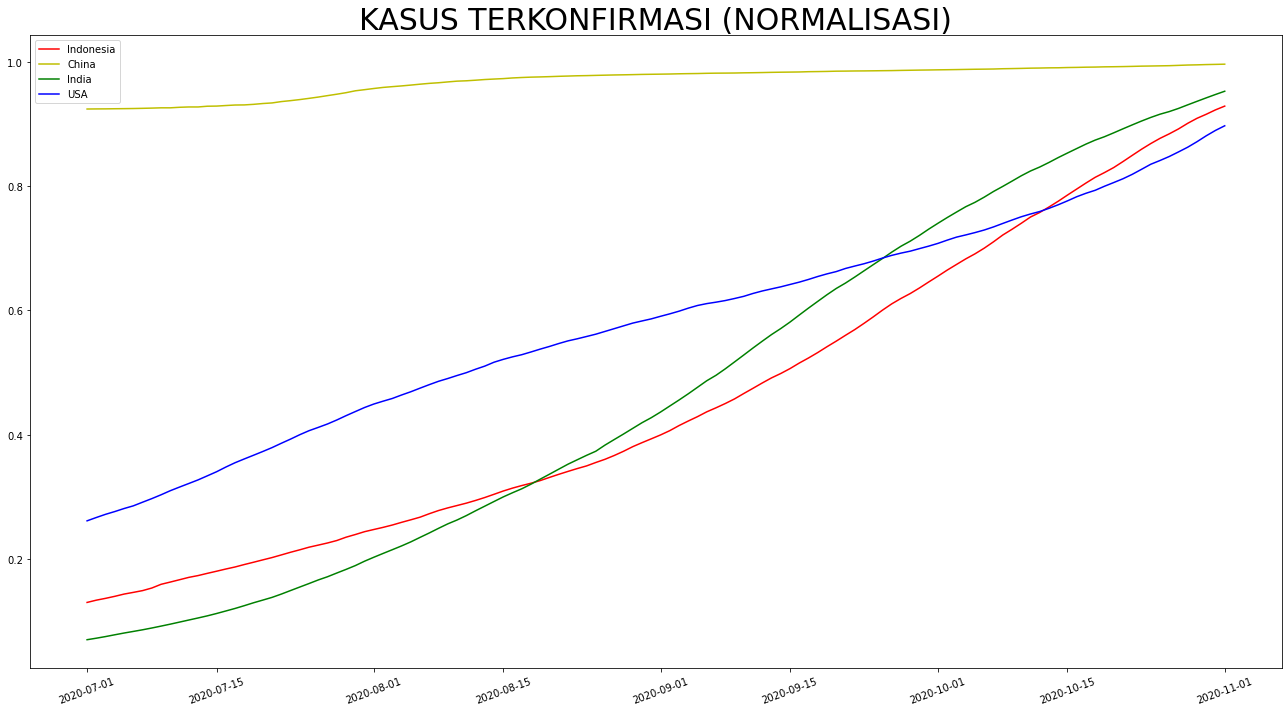

In [12]:
plt.figure(figsize=(18,10))

plt.plot(df_ina['date'], df_ina['cases_normalized'], 'r-', label='Indonesia')
plt.plot(df_chn['date'], df_chn['cases_normalized'], 'y-', label='China')
plt.plot(df_ind['date'], df_ind['cases_normalized'], 'g-', label='India')
plt.plot(df_usa['date'], df_usa['cases_normalized'], 'b-', label='USA')

plt.title('KASUS TERKONFIRMASI (NORMALISASI)', fontsize=30)

plt.xticks(rotation=20)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### > ANALISIS SEDERHANA :

> Melalui kedua visualisasi diatas, dapat di ambil kesimpulan bahwa memang jika kita lihat secara jumlah kasus positifnya, terlihat pada jumlah kasus positif per hari yang terpantau dari tanggal 1 July sampai 1 November 2020 di **Amerika (USA)** dan **India** memiliki angka tingkat pertumbuhan kasus positif yang bertambah cukup jauh jika di bandingkan dengan **Indonesia** dan **China**. Tetapi jika kita tampilkan data yang sudah di normalisasi, terlihat bahwa sebenarnya secara tingkat pertumbuhan kasus positif **Indonesia** juga masih belum aman dari bahaya covid per tanggal 1 November 2020, sebab angka pertumbuhannya masih cenderung naik. Bahkan terlihat pada pertengahan hingga akhir bulan Agustus, **Indonesia** dan **India** memiliki lonjakan (spike) yang lumayan tajam yang sementara masih belum terlihat tanda - tanda penurunan kasusnya. Sementara di **Amerika** lonjakan terjadi pada bulan Oktober, mungkin menjelang kampanye pemilihan presiden. Berbeda dengan **China**, sepertinya memang jumlah kasus per harinya sudah terkendali, terlihat dari grafik yang cenderung landai sejak bulan Agustus.